# 3. Metabolic task

A Metabolc task were first defined in Thiele and coworkers (2013):

*“metabolic task as a nonzero flux through a reaction or through a pathway leading to the production of a metabolite B from a metabolite A. The metabolic capacity of the network was demonstrated by testing nonzero flux values for these metabolic tasks. For each of the simulations, a steady-state flux distribution was calculated. Each metabolic task was optimized individually by choosing the corresponding reaction in the model, if present, as objective function and maximized the flux through the reaction”.*

It was then be emphasized in this research:
https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006867


In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("../../").resolve()))

%load_ext autoreload
%autoreload 2

In [67]:
import copy
import numpy as np
import seaborn as sns
import pipeGEM as pg

from pipeGEM.data.fetching import load_model
from pipeGEM.analysis.tasks import TaskTester, TaskContainer, TASKS_FILE_PATH
from pipeGEM.data.synthesis import get_syn_gene_data

from pipeGEM.integration.mapping import Expression

## Load existed task file

In [10]:
t_cont = TaskContainer.load(TASKS_FILE_PATH)

In [19]:
for i, (t_id, task) in enumerate(t_cont.items()):
    if i == 3:
        break
    print(f"Task ID: {t_id}", '\n', task)

Task ID: 1 
 system : ENERGY METABOLISM
subsystem : OXYDATIVE PHOSPHORYLATION
description : Oxidative phosphorylation via NADH-coenzyme Q oxidoreductase (COMPLEX I)
should fail : False
----- input metabolites -----

-------------------------------------
|   Met ID|      LB|      UB|   comp|
-------------------------------------
|      q10|   1.000|   1.000|      m|
|     nadh|   1.000|   1.000|      m|
|        h|   5.000|   5.000|      m|
-------------------------------------

----- output metabolites -----

-------------------------------------
|   Met ID|      LB|      UB|   comp|
-------------------------------------
|    q10h2|   1.000|   1.000|      m|
|      nad|   1.000|   1.000|      m|
|        h|   4.000|   4.000|      c|
-------------------------------------

Task ID: 2 
 system : ENERGY METABOLISM
subsystem : OXYDATIVE PHOSPHORYLATION
description : Oxidative phosphorylation via succinate-coenzyme Q oxidoreductase (COMPLEX II)
should fail : False
----- input metabolites ---

## Manipulate single task

In [21]:
print(t_cont["1"])

system : ENERGY METABOLISM
subsystem : OXYDATIVE PHOSPHORYLATION
description : Oxidative phosphorylation via NADH-coenzyme Q oxidoreductase (COMPLEX I)
should fail : False
----- input metabolites -----

-------------------------------------
|   Met ID|      LB|      UB|   comp|
-------------------------------------
|      q10|   1.000|   1.000|      m|
|     nadh|   1.000|   1.000|      m|
|        h|   5.000|   5.000|      m|
-------------------------------------

----- output metabolites -----

-------------------------------------
|   Met ID|      LB|      UB|   comp|
-------------------------------------
|    q10h2|   1.000|   1.000|      m|
|      nad|   1.000|   1.000|      m|
|        h|   4.000|   4.000|      c|
-------------------------------------



In [28]:
# attributes of a task object
for i in dir(t_cont["1"]):
    if not i.startswith("_"):
        print(i, getattr(t_cont["1"], i), "\n")

annotation None 

assign <bound method Task.assign of <pipeGEM.analysis.tasks.task.Task object at 0x7fee4ba444e0>> 

compartment_parenthesis [{}] 

compartment_str compartment 

description Oxidative phosphorylation via NADH-coenzyme Q oxidoreductase (COMPLEX I) 

in_mets [{'met_id': 'q10', 'lb': 1.0, 'ub': 1.0, 'compartment': 'm'}, {'met_id': 'nadh', 'lb': 1.0, 'ub': 1.0, 'compartment': 'm'}, {'met_id': 'h', 'lb': 5.0, 'ub': 5.0, 'compartment': 'm'}] 

knockout_input_flag True 

knockout_output_flag True 

lower_bound_str lb 

met_id_str met_id 

mets_in_model <bound method Task.mets_in_model of <pipeGEM.analysis.tasks.task.Task object at 0x7fee4ba444e0>> 

out_mets [{'met_id': 'q10h2', 'lb': 1.0, 'ub': 1.0, 'compartment': 'm'}, {'met_id': 'nad', 'lb': 1.0, 'ub': 1.0, 'compartment': 'm'}, {'met_id': 'h', 'lb': 4.0, 'ub': 4.0, 'compartment': 'c'}] 

should_fail False 

subsystem OXYDATIVE PHOSPHORYLATION 

system ENERGY METABOLISM 

to_dict <bound method Task.to_dict of <pipeGEM.analys

In [31]:
new_task = copy.deepcopy(t_cont["1"])

In [33]:
new_task.in_mets, new_task.out_mets

([{'met_id': 'q10', 'lb': 1.0, 'ub': 1.0, 'compartment': 'm'},
  {'met_id': 'nadh', 'lb': 1.0, 'ub': 1.0, 'compartment': 'm'},
  {'met_id': 'h', 'lb': 5.0, 'ub': 5.0, 'compartment': 'm'}],
 [{'met_id': 'q10h2', 'lb': 1.0, 'ub': 1.0, 'compartment': 'm'},
  {'met_id': 'nad', 'lb': 1.0, 'ub': 1.0, 'compartment': 'm'},
  {'met_id': 'h', 'lb': 4.0, 'ub': 4.0, 'compartment': 'c'}])

In [34]:
new_task.in_mets.append({"met_id": 'glc_D', 'lb': 0, 'ub': 10, 'compartment': 'c'})
new_task.out_mets.append({"met_id": 'co2', 'lb': 0, 'ub': 10, 'compartment': 'c'})
print(new_task)

system : ENERGY METABOLISM
subsystem : OXYDATIVE PHOSPHORYLATION
description : Oxidative phosphorylation via NADH-coenzyme Q oxidoreductase (COMPLEX I)
should fail : False
----- input metabolites -----

--------------------------------------
|   Met ID|      LB|       UB|   comp|
--------------------------------------
|      q10|   1.000|    1.000|      m|
|     nadh|   1.000|    1.000|      m|
|        h|   5.000|    5.000|      m|
|    glc_D|   0.000|   10.000|      c|
--------------------------------------

----- output metabolites -----

--------------------------------------
|   Met ID|      LB|       UB|   comp|
--------------------------------------
|    q10h2|   1.000|    1.000|      m|
|      nad|   1.000|    1.000|      m|
|        h|   4.000|    4.000|      c|
|      co2|   0.000|   10.000|      c|
--------------------------------------



In [35]:
# add to a task container
new_tc = TaskContainer()
new_tc["1"] = new_task

# you can use it to do the following task testing

## TaskTester

In [39]:
recon3d = load_model("Recon3D")

Output()

In [76]:
recon3d.metabolites.get_by_id("glc__D_c")

Metabolite identifier,glc__D_c
Name,D-Glucose
Memory address,0x07fee44a4af98
Formula,C6H12O6
Compartment,c
In 20 reaction(s),"GLCter, GLCtly, SBTR, MALT, r0354, r0355, GLCt4_2, GLCSGLT1le, GLPASE2, TREH, MLTG1, GLDBRAN, GLCt4, HEX1, GBA, RE1342C, GLCtg, GLCt1, GLCt2_2, r1392"


In [78]:
tester = TaskTester(recon3d, constr="None", 
                    task_container="../../tasks/tasks_recon3d.json",
                    model_compartment_parenthesis="_{}")

In [60]:
data = np.log2(get_syn_gene_data(recon3d, n_sample=3) + 1)

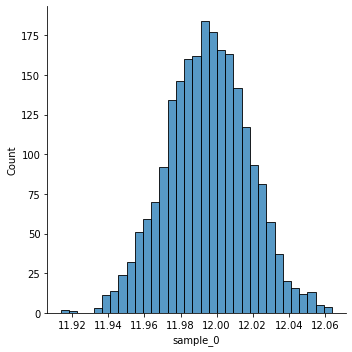

In [61]:
sns.displot(data["sample_0"])

In [53]:
data.head()

,sample_0,sample_1,sample_2
0,4031,4175,4187
26_AT1,4184,3982,4048
314_AT1,4098,4095,4093
8639_AT1,4207,4008,4199
314_AT2,4088,4077,4101


In [79]:
mapper = Expression(recon3d, data["sample_0"])
tester.update_thresholds(express_thres=12.02, 
                         non_express_thres=11.98, 
                         rxn_scores=mapper.rxn_scores)

In [80]:
tester.test()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Lcystin_c not exists in the model


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarn

mev_R_c not exists in the model
mev_R_c not exists in the model


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


pnto_R_c not exists in the model
globin_c not exists in the model
m4mpdol_U_c not exists in the model
m4mpdol_U_r not exists in the model
dolglcp_U_r not exists in the model
Asn_X_Ser_Thr_r not exists in the model
g3m8masn_r not exists in the model
doldp_U_r not exists in the model
l2fn2m2masn_g not exists in the model
ksi_g not exists in the model
score of the model: 197 / 210


In [81]:
tester.passed_rxns

{'1': ['DCK1m',
  'r0885',
  'DCYTtm',
  'ATPtm',
  'DCMPtm',
  'ATPS4mi',
  'NADH2_u10mi',
  'GTHRDt',
  'H2Otm',
  'ADADir'],
 '2': ['SUCD1m'],
 '3': ['PDHm'],
 '4': ['ACONTm',
  'SUCD1m',
  'AKGDm',
  'CSm',
  'FUMm',
  'ICDHxm',
  'MDHm',
  'SUCOAS1m'],
 '5': ['4MOPt2im',
  'ACONTm',
  'CO2tm',
  'DCK1m',
  'LEUTAm',
  'L_LACtcm',
  'PDHm',
  'r0819',
  'LEUTA',
  'PGM',
  'TPI',
  'PFK',
  'PYK',
  'DCYTtm',
  'CYOOm2i',
  'AKGDm',
  'ATPtm',
  'CSm',
  'ENO',
  'FBA',
  'PGI',
  'PGK',
  'LDH_L',
  'GAPD',
  'HEX1',
  'DCMPtm',
  'ATPS4mi',
  'CYOR_u10mi',
  'NADH2_u10mi',
  'FUMm',
  'GLUt2m',
  'H2Otm',
  'ICDHxm',
  'LDH_Lm',
  'LEUt5m',
  'MDHm',
  'O2tm',
  'SUCCtm',
  'SUCOASm',
  'ADADir',
  'r0509'],
 '6': ['r0355',
  'PGM',
  'TPI',
  'PFK',
  'PYK',
  'ENO',
  'FBA',
  'PGI',
  'PGK',
  'GAPD',
  'r0280'],
 '8': ['CATp'],
 '9': ['TRDR'],
 '10': ['ADSL2r',
  'AIRCr',
  'GARFT',
  'PRASCSi',
  'PRAIS',
  'G6PDH2c',
  'GNDc',
  'PRPPS',
  'AICART',
  'PRFGS',
  'IMPC',
  '

In [84]:
tester.result_df

,Passed,Should fail,Missing mets,Status,Obj_value,Obj_rxns
1,True,False,False,optimal,6.0,"[output_q10h2_m: q10h2_m --> , output_nad_m: n..."
2,True,False,False,optimal,2.0,"[output_fum_m: fum_m --> , output_fadh2_m: fad..."
3,True,False,False,optimal,3.0,"[output_accoa_m: accoa_m --> , output_nadh_m: ..."
4,True,False,False,optimal,10.0,"[output_coa_m: coa_m --> , output_fadh2_m: fad..."
5,True,False,False,optimal,76.0,"[output_atp_c: atp_c --> , output_h2o_c: h2o_c..."
...,...,...,...,...,...,...
206,True,False,False,optimal,3.0,"[output_Tn_antigen_g: Tn_antigen_g --> , outpu..."
207,True,False,False,optimal,23.0,"[output_ksii_core2_g: ksii_core2_g --> , outpu..."
208,True,False,False,optimal,25.0,"[output_ksii_core4_g: ksii_core4_g --> , outpu..."
209,True,False,False,optimal,57.0,"[output_m2mn_l: m2mn_l --> , output_fuc__L_l: ..."
